# Aprendizaje Automático - Práctica 3 - Ajuste de Modelos Lineales

# Problema de Clasificación

#### Valoración máxima: 6 puntos

#### Fecha límite de entrega: 4 de Junio de 2023 a las 23:59

#### Entrega a través de https://pradogrado2223.ugr.es/

### Nombre completo: <mark>MORENO MORÓN, JAVIER</mark>



---

**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero .ipynb). No es necesario entregar ninguna memoria externa, pero el código debe estar bien comentado, y todas las decisiones tomadas y el trabajo desarrollado deben documentarse suficientemente en celdas de texto.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final, dado que es altamente improbable que se extienda la fecha de entrega.

- Reiterar que es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también una valoración razonada sobre la calidad de los
resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El codigo NO puede escribir nada a disco.

- Se espera que el código siempre lea de un directorio llamado 'drive/MyDrive/Colab Notebooks/datos/', situado dentro del directorio donde se desarrolla y ejecuta la práctica. No se admiten excepciones a esta ruta de acceso a los datos.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- El código debe estar obligatoriamente comentado explicando lo que realizan los distintos apartados y/o bloques.

- Se entrega solamente este Notebook, y no los datos empleados.


---

<font color='blue'>Este trabajo  se centra en el ajuste y selección del mejor predictor lineal para un conjunto de datos dado. Para ello, se recomienda el uso de la librería Scikit-Learn (https://scikit-learn.org/). Esta librería contiene funciones de alto nivel que pueden ser muy útiles para el desarrollo de la práctica. En cualquier caso, para cada función de Scikit-Learn que se use, debe explicar por qué es necesario su uso, así como explicar su funcionamiento y el significado de todos sus parámetros. En relación con este punto, los valores por defecto en la librería no se consideran elecciones justificadas $\textit{a priori}$ y, al igual que en el resto de la práctica, decisiones sin justificación y resultados sin interpretación no serán considerados válidos.



#### <font color='blue'>1)  Analizar y describir adecuadamente el problema a resolver. Identificar los elementos $X$, $Y$ and $f$ del problema, y describirlos en detalle. 0.5 puntos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Conjunto de entrenamiento
train = np.loadtxt('drive/MyDrive/Colab Notebooks/datos/ticdata2000.txt', delimiter='\t')

train_x = train[:,:-1]
train_y = train[:,-1]

# Conjuto de test
test_x = np.loadtxt('drive/MyDrive/Colab Notebooks/datos/ticeval2000.txt', delimiter='\t')

# Etiquetas para test
test_y = np.loadtxt('drive/MyDrive/Colab Notebooks/datos/tictgts2000.txt', delimiter='\t')

# Unimos todo el dataset
test = np.append(test_x, test_y.reshape(-1, 1), axis=1)

datos = np.vstack((train, test))

Con la función loadtxt podemos pasar los datos del formato .txt a un array numpy, para ello indicamos que estos están separados por tabulaciones.

El dataset proviene de una competición de datamining europea organizada en el 2000, estos fueron proporcionados por Sentient Machine Research, el cual es un grupo que crea tecnologías y aplicaciones basadas en Inteligencia Artificial. No hay más información acerca de como han sido conseguidos los datos, pero dado que provienen de una empresa del mundo de la Inteligencia Artificial y han sido usados en una competición a nivel europeo confio en que han sido conseguidos de forma rigurosa y no contienen errores flagrantes.

Según la documentación nuestro training set está compuesto de 5822 muestras, con 85 características distintas más la etiqueta que clasifica las muestras en la última columna, esta etiqueta tiene los valores 0 o 1.

Las primeras 43 características corresponden a aspectos sociodemográficos y las restantes 42 a aspectos económicos, en cuanto a los aspectos sociodemográficos dependen del código postal del cliente, por lo que para mismos códigos postales tendremos los mismos aspectos sociodemográficos.

Nuestro cometido consiste en encontrar un ajuste que consiga clasificar nuevos clientes en si concederles un crédito para una caravana (1) o no (0), en base a las características que recoge el dataset.

Haciendo un análisis profundo observando el diccionario de características, tenemos que:


*   Columna 1: Habla acerca del tipo de cliente, es una característica nominal codificada de 1 a 41, necesitará one-hot encoding
*   Columna 2: Habla sobre el número de casas, valores numéricos del 1 al 10
*   Columna 3: Tamaño medio de las casas de ese código postal, valores numéricos del 1 al 6
*   Columna 4: Edad media en el código postal, variable ordinal codificada de 1 a 6, como la codificación hace referencia a intervalos de edades de igual tamaño y estos crecen de forma equivalente a la codificación asignada a los mismos, no considero necesario hacer one-hot encoding y dejo las variables en la forma 1-6
*   Columna 5: Parecida a C1, pero codificada de 1 a 10, también necesitará one-hot encoding
*   Columnas 6-43: Distintas métricas medias para ese código postal, todas son variables ordinales codificadas de 0 a 9, como la codificación hace referencia a intervalos de porcentaje iguales y estos crecen de forma equivalente a la codificación asignada a los mismos, no considero necesario hacer one-hot encoding y dejo las variables en la forma 0-9
*   Columnas 44-64: Cuanto dinero le cuesta al cliente los préstamos solicitados para distintas compras, todas variables ordinales codificadas de 0 a 9, como la codificación hace referencia a intervalos de dinero distintos considero necesario hacer one-hot encoding
*   Columnas 65-85: Número de préstamos solicitados por el cliente para distintas compras, todo valores numéricos entre 0 y 12

A continuación vamos a visualizar los datos para conocerlos más a fondo.

In [ ]:
from sklearn.model_selection import train_test_split

# Separamos en train y test proporcionalmente
train_x, test_x, train_y, test_y = train_test_split(datos[:,:-1], datos[:,-1], test_size=0.2, stratify=datos[:,-1], random_state=0)

train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

Para separar los datos usamos la función de scikit-learn train_test_split, que me separa el dataset en train y test, le pasamos el propio dataset, el tamaño en porcentaje que queremos que tenga test, le doy valor 0.2 para disponer de bastantes datos para entrenar, pero tampoco quedarnos luego con un conjunto de validación muy escueto. Al especificar stratify=datos[:,-1], se conserva la proporcionalidad de las clases en los conjuntos de entrenamiento y prueba y por último random_state sirve para inicializar la semilla, yo siempre suelo usar la 0.

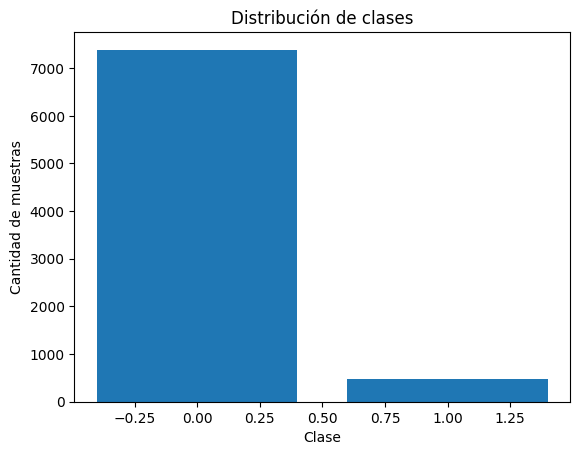

El  94.03080056001019 % de las muestras pertenecen a la clase 0
El  5.9691994399898185 % de las muestras pertenecen a la clase 1


In [ ]:
import seaborn as sns

# Gráfico de barras para mostrar la distribución de clases
unique_classes, class_counts = np.unique(train_y, return_counts=True)
plt.bar(unique_classes, class_counts)
plt.xlabel('Clase')
plt.ylabel('Cantidad de muestras')
plt.title('Distribución de clases')
plt.show()

# Numero de muestras de cada clase
class_0 = np.count_nonzero(train_y == 0)
class_1 = np.count_nonzero(train_y == 1)

print('El ', class_0/train_y.shape[0] * 100, '% de las muestras pertenecen a la clase 0')
print('El ', class_1/train_y.shape[0] * 100, '% de las muestras pertenecen a la clase 1')

Primeramente visualizamos las distribuciones de ambas clases para comprobar si existe desbalanceo de datos, y en efecto existe, tenemos que la gran mayoría de muestras son de personas a las que le es rechazado el crédito para la caravana. Más adelante para nuestro ajuste debemos tener en cuenta para evitar un ajuste deficiente que por ejemplo siempre rechaze el crédito, clasifique 0, tal vez haga que los errores de clasificar mal un 1 como 0 pesen más, aunque ya veré llegado el momento.

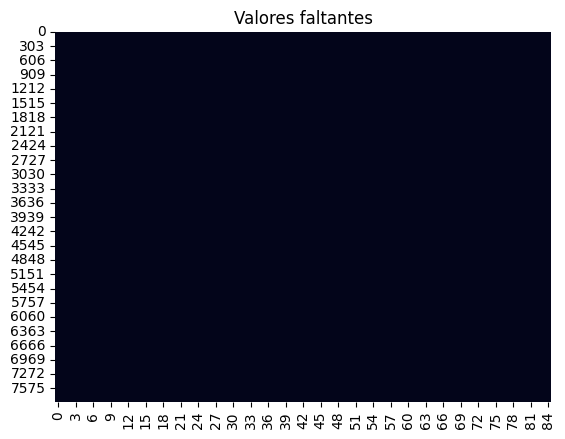

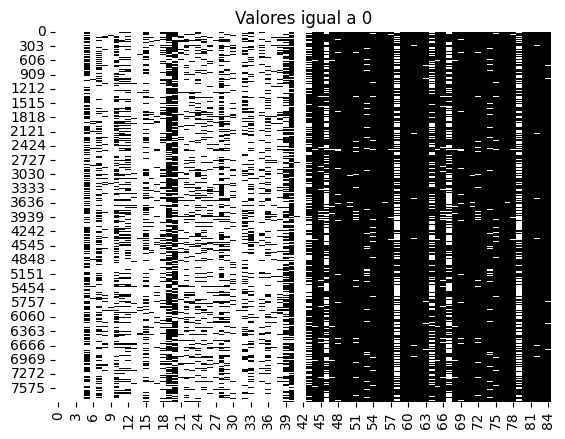

In [ ]:
# Mapa de calor para visualizar valores faltantes
sns.heatmap(np.isnan(train_x), cbar=False)
plt.title('Valores faltantes')
plt.show()

sns.heatmap(train_x==0, cbar=False, cmap='binary')
plt.title('Valores igual a 0')
plt.show()

Continuamos con la visualización de los datos, ahora vemos si hay algún dato faltante, en la documentación nos decían que no, pero no está de más comprobarlo, con un heatmap vemos si hay posiciones sin un valor numérico, vemos que no. En cuanto a valores 0 que tal vez puedan considerarse nulos viendo el diccionario veo que la mayoría de ceros son correctos y no se corresponden a valores faltantes.

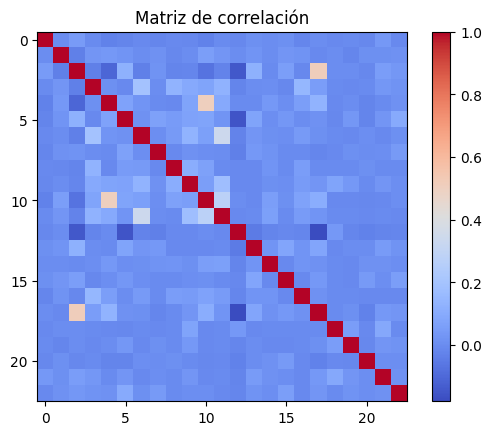

In [ ]:
# Crear una lista con los índices de las columnas categóricas
columnas_categoricas = [0]

for i in range(61):
  columnas_categoricas.append(i+3)

# Filtrar las columnas categóricas del dataset
data_categoricas = train_x[:, columnas_categoricas]

# Eliminar las columnas categóricas del dataset original
columnas_numericas = [i for i in range(train_x.shape[1]) if i not in columnas_categoricas]
data_numericas = train_x[:, columnas_numericas]

# Calcular la matriz de correlación para las columnas numéricas
correlation_matrix = np.corrcoef(data_numericas, rowvar=False)

# Visualizar la matriz de correlación en un mapa de calor
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()
plt.title('Matriz de correlación')
plt.show()

Para poder construir la matriz de correlación primero debemos discriminar toda variable categórica, ya que esta solo sirve para variables continuas, en nuestro caso solo las columnas 0 y 3-63 son categóricas.

Con la matriz de correlación podemos observar que no existe mucha correlación entre las características, no hay ni una zona roja a excepción claro de la diagonal principal que relaciona la característica consigo misma.

En resumen tras observar los datos llego a la conclusión de que solo debo preocuparme del desbalanceo entre las dos clases, ya que no faltan datos ni tenemos datos extremos, aunque para el escalado de variables he de tener en cuenta a todas las características.

#### <font color='blue'>2)  Identificar qué conjuntos de hipótesis se emplearán y justificar dicha elección. 0.25 puntos.

Regresión logística es un buen candidato a usarse, ya que a pesar de su nombre es muy común su uso en problemas de clasificación, sus ventajas frente a otros modelos son:



*   Interpretabilidad: La Regresión Logística proporciona coeficientes que indican la contribución relativa de cada característica en la clasificación. Esto permite interpretar el impacto de cada variable en la predicción.
*   Eficiencia computacional: La Regresión Logística es un algoritmo computacionalmente eficiente, especialmente en comparación con modelos más complejos como las redes neuronales.
*   Regularización: La Regresión Logística puede incluir términos de regularización para controlar el sobreajuste y mejorar el rendimiento del modelo en conjuntos de datos pequeños o con alta dimensionalidad.

Sin embargo, es importante tener en cuenta que la Regresión Logística asume una relación lineal entre las características y la probabilidad de clasificación, lo cual puede ser una limitación en problemas con relaciones no lineales más complejas, por lo que intentaremos limitar la complejidad de nuestro dataset.


Otro candidato es usar un SVM con kernel lineal, ya que este es conocido por su capacidad para manejar eficientemente conjuntos de datos de alta dimensión sin verse afectado por la maldición de la dimensionalidad, el cual es nuestro caso aunque posteriormente reduzcamos la dimensionalidad de los mismos.


Por último también me gustaría probar que tal funciona un SVM con kernel polinómico, se que no es un modelo lineal, pero al ser más poderoso en caso de que los datos no sean linealmente separables, caso que es muy probable, me interesa ver que tan bien se ajusta.

#### <font color='blue'>3)  Si la base de datos define conjuntos de training y test, únalos en un solo conjunto y genere sus propios conjuntos. Describa y justifique el mecanismo de partición. 0.75 puntos.

Como ya comento en el punto 1 para separar los datos usamos la función de scikit-learn train_test_split, con la que separamos el 20% de los datos para test y el 80% para training, la propia función se encarga de conservar la proporcionalidad de clases.

In [ ]:
from sklearn.model_selection import KFold

# Definir el objeto KFold con 5 folds
kf = KFold(n_splits=5)

# Realizar la validación cruzada
# for train_index, val_index in kf.split(train_x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    # train_x_fold, val_x_fold = train_x[train_index], train_x[val_index]
    # train_y_fold, val_y_fold = train_y[train_index], train_y[val_index]

    # Aquí entrenamos modelo en el conjunto de entrenamiento (train_x_fold, train_y_fold)
    # y evaluamos en el conjunto de validación (val_x_fold, val_y_fold)
    # por ejemplo:
    # model.fit(train_x_fold, train_y_fold)
    # pred_y = model.predict(val_x_fold)
    # luego, evaluamos el desempeño del modelo con métricas de evaluación



Aquí tenemos el esquema de partición de datos que usaremos para validar nuestros modelos, usamos 5-fold cross-validation partiendo de los datos de training, para ello usamos la clase KFold de scikit-learn, al inicializar el objeto le especificamos que queremos 5 folds, luego en un for para que haga los 5 folds llamamos al método split para que separe el dataset en los distintos splits. Tras esto comento el esquema de entrenamiento y validación que usaré con los distintos modelos.

Elijo esta partición de datos ya que la considero la más adecuada respecto a las demás, por ejemplo si usara leave-one-out para comparar tres modelos con distintos hiperparámetros con un dataset con tantas muestras tardaría muchísimo, aparte por el propio tamaño del dataset nos podemos permitir hacer splits medianamente grandes.

En cuanto a hold-out no sabemos si nuestro dataset es suficiente representativo del total de la población, aparte con la técnica elegida los tiempos de entrenamiento no serán muy altos tampoco, probablemente, por lo que no es necesario recurrir a hold-out.

Por último prefiero hacer primero una separación inicial de test y training, ya que considero que el 80% de 9822 muestras son suficientes para conformar el conjunto training, en vez de por ejemplo aplicar a todo el dataset CV y estimar el $E_{out}$ a partir del $E_{cv}$.

#### <font color='blue'>4)  Justifique todos los detalles del preprocesado de los datos (codificación, transformación, normalización, etc). Es decir, todas las manipulaciones sobre los datos iniciales que nos permitan fijar el conjunto de vectores de características que se usarán en el entrenamiento. 1 punto.

<font color='blue'>Nota: Las transformaciones no-lineales de las variables pueden definirse a partir de las potencias y
productos de potencias de las variables originales, conjuntos de polinomios ortogonales, etc. Si se
usan transformaciones no polinómicas de las variable como $log$, $\sqrt{()}$, $sin$, etc, debe justificar el
interés de las mismas.

In [ ]:
# Comprobar columnas con un solo valor (características no discriminatorias)
columnas_un_valor = []
num_columnas = train_x.shape[1]

for i in range(num_columnas):
    valores_unicos = np.unique(train_x[:, i])
    if len(valores_unicos) == 1:
        columnas_un_valor.append(i)

print("Columnas con un solo valor:", columnas_un_valor)

Columnas con un solo valor: []


En el paso 1 al visibilizar el heatmap del dataset para los valores nulos (0), me pareció ver columnas donde todos los valores eran 0, por lo que aquí compruebo si esto es correcto para eliminar esas características, ya que si una característica es la misma para todas las muestras esta no es discriminatoria y se puede eliminar sin que influya negativamente en el ajuste, pero no es el caso por lo que no eliminamos nada.

En cuanto a valores extremos recuerdo que no he encontrado ninguna característica que contenga valores anómalos, como tampoco hay datos faltantes.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Crear una lista con los índices de las columnas que no se van a normalizar
columnas_sin_normalizar = [0, 4]

for i in range(21):
  columnas_sin_normalizar.append(i+43)

# Separar las columnas a normalizar del resto
columnas_normalizar_train = np.delete(train_x, columnas_sin_normalizar, axis=1)
columnas_sin_modificar_train = train_x[:, columnas_sin_normalizar]

columnas_normalizar_test = np.delete(test_x, columnas_sin_normalizar, axis=1)
columnas_sin_modificar_test = test_x[:, columnas_sin_normalizar]

# Normalizar
columnas_normalizadas_train = scaler.fit_transform(columnas_normalizar_train)
columnas_normalizadas_test = scaler.transform(columnas_normalizar_test)



Llegamos a la parte de normalizar, hacemos esto para tener todos los datos en un rango similar y así reducir los tiempos de entrenamiento. Primero separamos las características categóricas del resto, ya que estas van a ser codificadas con one-hot encoding, recordar que algunas de estas características no les ibamos a aplicar one-hot encoding, esas si que las normalizamos junto con las características continuas.

Para la normalización usamos la clase StandardScaler de scikit learn, comentar que elijo la normalización min-max, ya que es más sencilla, primero normalizo los datos de train y luego con los mismos valores con los que se ha normalizado train normalizo test, por eso uso fit_transform para train y transform para test.

In [ ]:
highly_correlated_cols = np.where(np.abs(correlation_matrix) > 0.99)

cols_redundantes = np.empty(shape=(0,))

# Crear una lista con los índices de las columnas categóricas (En columnas_normalizadas_train y test)
columnas_categoricas = [2]

for i in range(38):
  columnas_categoricas.append(i+4)

# Separar las columnas categóricas del resto
columnas_correlacionar_train = np.delete(columnas_normalizadas_train, columnas_categoricas, axis=1)
columnas_sin_correlacionar_train = columnas_normalizadas_train[:, columnas_categoricas]

columnas_correlacionar_test = np.delete(columnas_normalizadas_test, columnas_categoricas, axis=1)
columnas_sin_correlacionar_test = columnas_normalizadas_test[:, columnas_categoricas]

# Pares de columnas correlacionadas
for i, j in zip(highly_correlated_cols[0], highly_correlated_cols[1]):
    if i > j:
      print(f"Columna {j} está altamente correlacionada con columna {i}") # Los índices corresponden a columnas_correlacionar_train

      # Añadimos una de las dos columnas relacionadas a las a borrar
      cols_redundantes = np.append(cols_redundantes, i)

cols_redundantes = cols_redundantes.astype(int)

# Columnas redundantes
print("Columnas redundantes:", cols_redundantes)

# Eliminar las columnas redundantes
columnas_correlacionadas_train = np.delete(columnas_correlacionar_train, cols_redundantes, axis=1)
columnas_correlacionadas_test = np.delete(columnas_correlacionar_test, cols_redundantes, axis=1)

Columnas redundantes: []


Como ya sabíamos no hay ningún tipo de relación entre atributos, de todas formas lo comprobamos por si acaso, pero confirmamos que así es. Hemos separado las características categóricas-codificadas numéricamente de las características continuas, esto nos deja tres particiones, estas dos y la formada por las características categóricas-codificables con one-hot encoding.

In [ ]:
from sklearn.decomposition import PCA

# Creo una instancia del objeto PCA y especifico la varianza a mantener deseada
pca = PCA(n_components=0.98)

# Aplico PCA al dataset
pca_train_x = pca.fit_transform(columnas_correlacionadas_train)

# Obtener la varianza explicada por cada componente principal
variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:", variance_ratio)

# Aplicamos la reducción también a test
pca_test_x = pca.transform(columnas_correlacionadas_test)


Varianza explicada por cada componente principal: [0.08367983 0.05966515 0.05761792 0.04989215 0.04832307 0.04808295
 0.04724817 0.04436663 0.0443168  0.04365835 0.04319301 0.04224407
 0.04180522 0.04122436 0.04084346 0.03945775 0.03926869 0.03768669
 0.03655185 0.03283642 0.03074653 0.02836311]


Pasamos a aplicar PCA para reducir la dimensionalidad de nuestro dataset.

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad que se utiliza para encontrar las direcciones principales de mayor variabilidad en un conjunto de datos y proyectar los datos en un nuevo espacio de menor dimensión.

En este ejemplo, creamos una instancia del objeto PCA con n_components=0.99 para reducir la dimensionalidad conservando el 99% de la varianza.

Luego, aplicamos PCA al dataset train utilizando fit_transform, lo que calcula las componentes principales y transforma los datos al nuevo espacio reducido. El resultado se almacena en pca_train_x, que es un nuevo conjunto de datos con una dimensionalidad reducida.

También obtenemos la varianza explicada por cada componente principal utilizando explained_variance_ratio_. Esto nos proporciona una medida de cuánta información captura cada componente principal en relación con la varianza total de los datos.

Conservando el 99% de la varianza nos quedamos con las 23 características iniciales, pruebo a reducir un poco la varianza hasta el 95%, ya que considero que conservo suficiente información con el 95% de la varianza, esto me reduce la dimensionalidad hasta 21 características, no es una reducción muy significativa, pero como conservando un 99% de varianza no pierdo ni una característica sigo jugando con el porcentaje a ver si consigo al menos reducir en uno la dimensionalidad.

Finalmente me quedo con un 98% de la variabilidad, ya que no pierdo mucho y al menos reduzco la dimensionalidad en uno, por último aplico a los datos de test esta reducción a partir de los componentes principales aprendidos de training.

In [ ]:
# Codificamos las columnas categóricas con one-hot-encoding
col1 = np.eye(41)[columnas_sin_modificar_train[:, 0].astype(int) - 1]
col_test1 = np.eye(41)[columnas_sin_modificar_test[:, 0].astype(int) - 1]

col2 = np.eye(10)[columnas_sin_modificar_train[:, 1].astype(int) - 1]
col_test2 = np.eye(10)[columnas_sin_modificar_test[:, 1].astype(int) - 1]

col_train = np.hstack((col1, col2))
col_test = np.hstack((col_test1, col_test2))

for i in range(21):
  col_aux_train = np.eye(10)[columnas_sin_modificar_train[:, i+2].astype(int)]
  col_aux_test = np.eye(10)[columnas_sin_modificar_test[:, i+2].astype(int)]

  col_train = np.hstack((col_train, col_aux_train))
  col_test = np.hstack((col_test, col_aux_test))

# Añadimos las columnas categóricas al inicio, luego las categóricas ordinales y al final las continuas
mount_train_x = np.hstack((col_train, columnas_sin_correlacionar_train, pca_train_x))
mount_test_x = np.hstack((col_test, columnas_sin_correlacionar_test, pca_test_x))

 Para acabar las características categóricas cardinales aplico one-hot-encoding y uno los tres tipos de columna, hago one-hot encoding manualmente porque usando la clase correspondiente de scikit-learn me daba problemas al pasarle la lista de valores que pueden tomar las características, y si no se lo pasaba resulta que en test hay valores para alguna columna que no están en train y por tanto no se tienen en cuenta al aprender la codificación con train y luego da error al codificar test con lo aprendido en train.

 IMPORTANTE: Nose si esto se considera data snooping, no creo, ni siquiera he visto test, simplemente he obtenido el error al ejecutar con la función de scikit-learn y he llegado a la conclusión antes comentada de que en test hay columnas con valores que no están en train, esta información tampoco influye en la forma en la que voy a actuar para resolver el problema, simplemente ha influido en la forma de implementar one-hot encoding.

En cuanto a transformaciones en los datos para por ejemplo convertir un dataset no linealmente separable en uno que si lo sea, la verdad que sería ir dando palos de ciego, por lo que de momento al menos no haré ninguna transformación.

#### <font color='blue'>5)  Justifique las métricas de error y la función de pérdida a usar. Discutir su idoneidad para el problema. 0.5 puntos.

Existen varias candidatas, estas son:
*   Exactitud (Accuracy): Es la métrica más básica y representa la proporción de predicciones correctas sobre el total de muestras.
Sin embargo, la exactitud puede no ser adecuada en casos de desbalanceo de clases, donde la mayoría de las muestras pertenecen a una clase dominante.
*   La especificidad, también conocida como tasa de verdaderos negativos (True Negative Rate, TNR) o tasa de especificidad, es una métrica utilizada para evaluar la calidad de un modelo de clasificación. Mide la proporción de instancias negativas que son correctamente clasificadas como negativas en relación al total de instancias negativas reales.
La especificidad es una métrica importante en problemas de clasificación, especialmente cuando existe un desequilibrio en las clases. Proporciona información sobre la capacidad del modelo para clasificar correctamente las instancias negativas.
*   Recall (Sensibilidad o Exhaustividad): Mide la proporción de muestras positivas clasificadas correctamente sobre el total de muestras positivas en el conjunto de datos.
El recall es útil cuando el enfoque está en minimizar los falsos negativos, es decir, cuando es importante evitar clasificar incorrectamente muestras positivas como negativas.
*   F1-Score: Combina la precisión y el recall en una única métrica que proporciona un equilibrio entre ambas. Se calcula como la media armónica de precisión y recall. El F1-Score es especialmente útil cuando las clases están desbalanceadas.
*   Matriz de confusión: Es una tabla que muestra la cantidad de muestras clasificadas correctamente e incorrectamente para cada clase. Proporciona información detallada sobre los verdaderos positivos (TP), falsos positivos (FP), verdaderos negativos (TN) y falsos negativos (FN).

Recuerdo que existe un gran desbalanceo entre las clases, por lo que usar la accuracy únicamente no será la mejor idea, ya que puedo tener un modelo malísimo que simplemente clasifique todo como 0, es decir, rechazar el crédito siempre y obtener un 94% de accuracy, por lo que acompañaré su visionado de la especificidad y la sensibilidad para comprobar que no se clasifica todo como 0.

Mostrar la matriz de confusión siempre es util ya que nos ofrece un resumen total de como clasifica nuestro modelo, por lo que seguro que la uso.

En cuanto a las funciones de pérdida, dependiendo del modelo usaré una u otra:

*  Regresión Logística:
La regresión logística utiliza la función de pérdida de entropía cruzada binaria (binary cross-entropy) normalmente y como es la que hemos usado cuando utilizabamos RL, será la que use.

*  SVM con Kernel Lineal:
El SVM con kernel lineal utiliza la función de pérdida de bisagra (hinge loss), también conocida como función de pérdida SVM. Esta función de pérdida tiene como objetivo maximizar el margen entre las clases y penalizar los puntos mal clasificados.

*  SVM con Kernel Polinómico:
El SVM con kernel polinómico también utiliza la función de pérdida de bisagra (hinge loss), al igual que el SVM con kernel lineal.

Al tener un gran desbalanceo entre las clases esperemos que la función de pérdida de bisagra nos sea de utilida gracias a la penalización que aplica a los puntos mal clasificados, aunque deberemos aumentar esa penalización para cuando clasifica un 1 como 0.

#### <font color='blue'>6)  Discuta todos los parámetros y el tipo de regularización usada en el ajuste de los modelos seleccionados. Justificar la idoneidad de la regularización elegida. 1 punto.

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, log_loss

def crossValidation(model, kFolds, dataset_x, dataset_y, titulo, return_metrics=False):
  conf_matrix = np.zeros((2, 2))
  iters = 0

  for train_index, val_index in kFolds.split(dataset_x):
    # Obtener los conjuntos de entrenamiento y validación para cada fold
    train_x_fold, val_x_fold = dataset_x[train_index], dataset_x[val_index]
    train_y_fold, val_y_fold = dataset_y[train_index], dataset_y[val_index]

    # Entrenar el modelo en el conjunto de entrenamiento
    model.fit(train_x_fold, train_y_fold)

    # Evaluar el desempeño del modelo en el conjunto de validación
    pred_y = model.predict(val_x_fold)

    # Calcular la matriz de confusión
    conf_matrix += np.array(confusion_matrix(val_y_fold, pred_y))

    # Guardar iteraciones consumidas
    iters += model.n_iter_

  conf_matrix = conf_matrix/5

  tn = conf_matrix[0,0]
  fp = conf_matrix[0,1]
  fn = conf_matrix[1,0]
  tp = conf_matrix[1,1]

  # Calcular métricas de error
  accuracy = (tp + tn) / (tp + tn + fp + fn)
  especificidad = tn / (tn + fp)
  recall = tp / (tp + fn)

  # Imprimir el desempeño del modelo
  print("\n\n", titulo)
  print("\nAccuracy media:", accuracy)
  print("Especificidad media:", especificidad)
  print("Recall medio:", recall)
  print("Matriz de confusión media:")
  print(conf_matrix)
  print("Iteraciones hasta converger:", iters/5)

  if return_metrics:
    return model, accuracy, especificidad, recall, conf_matrix, iters/5
  else:
    return model



Para poder hacer comprobaciones de las estadísticas de cada modelo creo esta función que se encarga de hacer Cross-Validation con 5-folds para el modelo seleccionado, luego imprime las métricas de error medias de ese modelo y devuelve el modelo en sí.

Para entrenar el modelo de Regresión Logística cuento con los siguientes parámetros, estos parámetros no son del modelo RL exclusivamente, sino que son de una función llamada SGDClassifier, en la que dependiendo de la función de pérdida especificada implementa RL u otro modelo como puede ser también SVM con kernel lineal:

*   loss: Se refiere a la función de pérdida a utilizar, como el modelo es RL su función de pérdida será la de la entropía cruzada, 'log_loss'
*   penalty: Hace referencia al término de regularización, usamos 'l2' o weight decay, ya que tras aplicar PCA nos hemos quedado con las características más imprescindibles, por lo que todas deben tenerse en cuenta, de todas formas acabaré probando también 'l1' para ver si da mejores resultados.
*   alpha: Es el factor de regularización, a mayor alpha, con mayor fuerza se aplicará la regularización.
*   l1_ratio: Sirve para indicar si queremos aplicar l1 (l1_ratio = 1), l2 (l1_ratio = 0) o una mezcla entre ambas que dependiendo de si el valor usado se acerca más a 1 o a 0 tendrá más fuerza l1 o l2. Aplica solo cuando la regularización es elástica.
*   fit_intercept: Sirve para introducir un término para el sesgo, en nuestro caso lo ponemos a True ya que no queremos que nuestro modelo pase obligatoriamente por el origen. Ya está por defecto a True.
*   max_iter: Por defecto a 1000, solo las aumento si en esas 1000 no converge el modelo.
*   tol: Representa la tolerancia para el criterio de convergencia del algoritmo de optimización utilizado en el modelo. La tolerancia determina cuándo se considera que el algoritmo ha convergido. Si el cambio en la función objetivo entre dos iteraciones consecutivas es menor que la tolerancia, se considera que el algoritmo ha convergido y se detiene el entrenamiento.
*   shuffle: Determina si en cada iteración se debe revolver el dataset. Está a True por defecto.
*   epsilon: Se refiere al tamaño de paso (step size) para la actualización de los coeficientes durante el entrenamiento del modelo. Un valor más pequeño de epsilon implica un tamaño de paso más pequeño, lo que puede resultar en una convergencia más precisa pero también puede requerir más iteraciones para alcanzar la convergencia. Por otro lado, un valor más grande de epsilon permite tamaños de paso más grandes, lo que puede acelerar la convergencia pero puede ser menos preciso.
*   random_state: Establece la semilla para shuffle.
*   learning_rate: Sirve para especificar si queremos que el learning rate sea constante o variable, para el variable existen varias opciones que usan distintas reglas de adaptación.
*   eta0: Valor inicial para el learning rate.
*   power_t: Es un parámetro que controla la tasa de decrecimiento del tamaño de paso durante el entrenamiento del modelo. Este decrece en base a la siguiente fórmula: $eta = eta0 / t^{powert}$.
El valor de power_t debe ser un número en el rango [0, 1]. Un valor más bajo de power_t indica un decrecimiento más rápido del tamaño de paso, lo que puede hacer que el modelo converja más rápidamente pero con más fluctuaciones. Un valor más alto de power_t indica un decrecimiento más lento del tamaño de paso, lo que puede hacer que el modelo converja más lentamente pero con menos fluctuaciones.
*   early_stopping: Es un parámetro que permite utilizar la técnica de detención anticipada durante el entrenamiento del modelo.
Cuando early_stopping se establece en True, el modelo utilizará una porción de los datos de entrenamiento como conjunto de validación y controlará el rendimiento del modelo en este conjunto en cada época de entrenamiento. Si el rendimiento del modelo en el conjunto de validación deja de mejorar durante un número consecutivo de épocas especificado por el parámetro n_iter_no_change, entonces el entrenamiento se detiene y el modelo se devuelve con los parámetros que obtuvieron el mejor rendimiento en el conjunto de validación. Como nosotros ya usamos CV donde usamos una parte de training como validación dejaremos el parámetro a False.
*   n_iter_no_change: Número de iteraciones sin mejorar el ajuste a esperar antes de parar dicho ajuste, por defecto a 5.
*   class_weight: Sirve para indicar al modelo que las clases están desbalanceadas, en caso de indicarle 'balanced' se ajusta automáticamente los pesos de las clases inversamente proporcionalmente a su frecuencia en los datos de entrenamiento. Será lo que usemos en este caso, ya que existe un desbalanceo muy fuerte.
*   warm_start: Se utiliza para permitir el entrenamiento incremental del modelo. Cuando warm_start se establece en True, el modelo conserva los pesos obtenidos del entrenamiento anterior y continúa el entrenamiento en nuevos datos adicionales. Está a False por defecto.
*   average: Se utiliza para especificar cómo calcular los pesos promedio después del entrenamiento. Es relevante solo cuando se utiliza la técnica de promedio de pesos para mejorar el rendimiento del modelo. Está preestablecido a False.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL = SGDClassifier(loss='log_loss', penalty="l2", alpha=0.0001, tol=0.001, epsilon=0.1, random_state=0, learning_rate='constant', eta0=0.1, power_t=0.5, n_iter_no_change=5, class_weight="balanced")

# CV para el modelo RL
model_RL_tr = crossValidation(model_RL, kf, mount_train_x, train_y, "REGRESION LOGISTICA")



 REGRESION LOGISTICA

Accuracy media: 0.5759195621738576
Especificidad media: 0.569301570113698
Recall medio: 0.6801705756929638
Matriz de confusión media:
[[841.2 636.4]
 [ 30.   63.8]]
Iteraciones hasta converger: 11.6


Vemos que con los parámetros elegidos inicialmente tenemos un modelo bastante malo, con un accuracy de solo el 57%, al menos el problema del desbalanceo de clases está solventado, podemos observar con la especificidad y el recall que el modelo predice muestras de ambas clases, incluso más porcentaje de la clase 1 que de la 0.

Para intentar mejorar el modelo voy a ir modificando parámetros, empezaré por hacer que el learning rate sea adaptativo, en scikit learn existen varias reglas de adaptación, usaré 'adaptive', que según deja de mejorar el modelo n_iter_no_change iteraciones consecutivas disminuye el valor del learning rate.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL_2_0 = SGDClassifier(loss='log_loss', penalty="l2", alpha=0.0001, tol=0.001, epsilon=0.1, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, n_iter_no_change=5, class_weight="balanced")

# CV para el modelo RL
model_RL_2_0_tr = crossValidation(model_RL_2_0, kf, mount_train_x, train_y, "REGRESION LOGISTICA")



 REGRESION LOGISTICA

Accuracy media: 0.7079037800687284
Especificidad media: 0.7123714131023281
Recall medio: 0.6375266524520256
Matriz de confusión media:
[[1052.6  425. ]
 [  34.    59.8]]
Iteraciones hasta converger: 97.8


Vemos una mejora significativa, accuracy al 70%, aunque siguen siendo valores bajos, ahora iremos modificando los parámetros en orden para ir eligiendolos de forma óptima, ya que creo que las mejoras serán menores que la producida al seleccionar un learning rate adaptativo. Empezamos modificando el tipo de regularización, había comentado anteriormente que todas las características eran ya relevantes, pero tal vez con las características 1 y 5 pueda jugar l1. No probaré con penalty='elasticnet', ya que entonces tendría que ponerme a probar valores para l1_ratio y ya son demasiados parámetros.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL_2_1 = SGDClassifier(loss='log_loss', penalty="l1", alpha=0.0001, tol=0.001, epsilon=0.1, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, n_iter_no_change=5, class_weight="balanced")

# CV para el modelo RL
model_RL_2_1_tr = crossValidation(model_RL_2_1, kf, mount_train_x, train_y, "REGRESION LOGISTICA")



 REGRESION LOGISTICA

Accuracy media: 0.7026855033727887
Especificidad media: 0.7080400649702221
Recall medio: 0.6183368869936035
Matriz de confusión media:
[[1046.2  431.4]
 [  35.8   58. ]]
Iteraciones hasta converger: 104.0


Podemos confirmar que todas las características eran relevantes, los resultados son prácticamente idénticos a los de regulación l2, por lo que seguiré usando esta. Pasamos ahora a modificar alpha, aunque dudo que mejore el ajuste mucho, ya que ya tenemos un valor bajo de este por lo que la regularización que se aplica es baja y por tanto se permite ajustar mucho a los datos de entrenamiento, incluso sobreajustar aunque los resultados obtenidos no dan esa sensación.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL_2_2 = SGDClassifier(loss='log_loss', penalty=None, alpha=0.0001, tol=0.001, epsilon=0.1, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, n_iter_no_change=5, class_weight="balanced")

# CV para el modelo RL
model_RL_2_2_tr = crossValidation(model_RL_2_2, kf, mount_train_x, train_y, "REGRESION LOGISTICA")



 REGRESION LOGISTICA

Accuracy media: 0.7005218276695939
Especificidad media: 0.7051976177585274
Recall medio: 0.6268656716417911
Matriz de confusión media:
[[1042.   435.6]
 [  35.    58.8]]
Iteraciones hasta converger: 93.4


En vez de reducir alpha pruebo a directamente no regularizar, vemos que los resultados son similares, esto es por lo que ya he dicho de que alpha ya tenía un valor bajo, dejaré l2 regularization ya que siempre está bien regularizar. Pasamos ahora a modificar tol, recordar que es el criterio de parada, si la mejora de pérdida es menor a dicho valor se para, probaré a hacerlo menor para que el ajuste afine más.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL_3_0 = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.1, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, n_iter_no_change=5, class_weight="balanced")

# CV para el modelo RL
model_RL_3_0_tr = crossValidation(model_RL_3_0, kf, mount_train_x, train_y, "REGRESION LOGISTICA")



 REGRESION LOGISTICA

Accuracy media: 0.7076492299859997
Especificidad media: 0.7121007038440715
Recall medio: 0.6375266524520256
Matriz de confusión media:
[[1052.2  425.4]
 [  34.    59.8]]
Iteraciones hasta converger: 98.8


Hay una leve mejora, menos de un 1% para la accuracy, en cuanto al número de iteraciones, este aumenta en 1, por lo que realmente la pérdida aumenta muy poco ya y acaba siendo menor que el nuevo tol casi en la misma iteración que con el antiguo, dejaré este por si modificando otros parámetros ayuda que el criterio de parada sea menor, aparte no consume mayor tiempo. Ahora modificamos epsilon, este equivale al tamaño de paso, como el tiempo de convergencia es bajo lo disminuiremos a ver si obtenemos un ajuste más preciso.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL_4_0 = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

# CV para el modelo RL
model_RL_4_0_tr = crossValidation(model_RL_4_0, kf, mount_train_x, train_y, "REGRESION LOGISTICA")



 REGRESION LOGISTICA

Accuracy media: 0.7099401807305588
Especificidad media: 0.7142663779101245
Recall medio: 0.6417910447761194
Matriz de confusión media:
[[1055.4  422.2]
 [  33.6   60.2]]
Iteraciones hasta converger: 156.0


Sin cambios, he modificado también n_iter_no_chage a 10 para que no acabara el ajuste porque los pesos no se modifican en 5 iteraciones, aquí vemos que realmente hay más iteraciones pero realmente RL no consigue mejorar el ajuste más, probablemente haya llegado a su óptimo, aún así voy a seguir con el resto de parámetros que quedan, dejaré epsilon y n_iter_no_change a los valores actuales por si ayudan a mejorar los resultados ya que el tiempo de cómputo sigue siendo bajo. Probamos ahora con el valor inicial del learning rate, aquí probaré varios.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL_4_1 = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.01, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

# CV para el modelo RL
model_RL_4_1_tr = crossValidation(model_RL_4_1, kf, mount_train_x, train_y, "REGRESION LOGISTICA (lr = 0.01)")



 REGRESION LOGISTICA (lr = 0.01)

Accuracy media: 0.711340206185567
Especificidad media: 0.7141310232809963
Recall medio: 0.6673773987206824
Matriz de confusión media:
[[1055.2  422.4]
 [  31.2   62.6]]
Iteraciones hasta converger: 121.2


In [ ]:
# Crear un modelo de Regresión Logística
model_RL_4_2 = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.001, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

# CV para el modelo RL
model_RL_4_2_tr = crossValidation(model_RL_4_2, kf, mount_train_x, train_y, "REGRESION LOGISTICA (lr = 0.001)")



 REGRESION LOGISTICA (lr = 0.001)

Accuracy media: 0.7149039073437699
Especificidad media: 0.7162966973470493
Recall medio: 0.6929637526652452
Matriz de confusión media:
[[1058.4  419.2]
 [  28.8   65. ]]
Iteraciones hasta converger: 95.6


In [ ]:
# Crear un modelo de Regresión Logística
model_RL_4_3 = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=1, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

# CV para el modelo RL
model_RL_4_3_tr = crossValidation(model_RL_4_3, kf, mount_train_x, train_y, "REGRESION LOGISTICA (lr = 1)")



 REGRESION LOGISTICA (lr = 1)

Accuracy media: 0.7095583556064655
Especificidad media: 0.713589604764483
Recall medio: 0.6460554371002132
Matriz de confusión media:
[[1054.4  423.2]
 [  33.2   60.6]]
Iteraciones hasta converger: 198.0


In [ ]:
# Crear un modelo de Regresión Logística
model_RL_5_0 = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

# CV para el modelo RL
model_RL_5_0_tr = crossValidation(model_RL_5_0, kf, mount_train_x, train_y, "REGRESION LOGISTICA (lr = 0.0004)")



 REGRESION LOGISTICA (lr = 0.0004)

Accuracy media: 0.7160493827160493
Especificidad media: 0.7180563075257175
Recall medio: 0.6844349680170575
Matriz de confusión media:
[[1061.   416.6]
 [  29.6   64.2]]
Iteraciones hasta converger: 83.2


Vemos que en general la mejora es mínima si es que la hay para distintos valores de learning rate inicial, como con lr = 0.0004 tenemos los mejores resultados, usaré ese. Por último probaré a ver que resultados me da no indicar el desbalanceo de clases, aunque sospecho que el modelo simplemente predecirá todo como clase 0.

In [ ]:
# Crear un modelo de Regresión Logística
model_RL_5_1 = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, n_iter_no_change=10)

# CV para el modelo RL
model_RL_5_1_tr = crossValidation(model_RL_5_1, kf, mount_train_x, train_y, "REGRESION LOGISTICA")



 REGRESION LOGISTICA

Accuracy media: 0.9395443553519155
Especificidad media: 0.9987818083378451
Recall medio: 0.006396588486140725
Matriz de confusión media:
[[1.4758e+03 1.8000e+00]
 [9.3200e+01 6.0000e-01]]
Iteraciones hasta converger: 192.6


Como vemos parece que el modelo llega a predecir alguna clase 1, aunque se trata de una cantidad irrisoria equivalente a no predecir ningún 1, por lo que el modelo RL final es:

In [ ]:
# Modelo de Regresión Logística final
model_RL_final = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

# CV para el modelo RL
model_RL_final_tr, accu_RL, espec_RL, recall_RL, matrix_RL, iters_RL = crossValidation(model_RL_final, kf, mount_train_x, train_y, "REGRESION LOGISTICA FINAL", return_metrics=True)



 REGRESION LOGISTICA FINAL

Accuracy media: 0.7160493827160493
Especificidad media: 0.7180563075257175
Recall medio: 0.6844349680170575
Matriz de confusión media:
[[1061.   416.6]
 [  29.6   64.2]]
Iteraciones hasta converger: 83.2


Pasamos a ajustar el modelo de SVM lineal, para el usamos también la función de scikit learn SGDClassifier, por lo que los parámetros son los mismos que para RL. Empezamos al igual que con RL con los valores por defecto.

In [ ]:
# Crear un modelo de SVM con kernel lineal
model_SVM_lineal = SGDClassifier(loss='squared_hinge', penalty="l2", alpha=0.0001, tol=0.001, epsilon=0.1, random_state=0, learning_rate='constant', eta0=0.1, power_t=0.5, class_weight="balanced")

# CV para el modelo SVM kernel lineal
model_SVM_l_tr = crossValidation(model_SVM_lineal, kf, mount_train_x, train_y, "SVM kernel lineal")



 SVM kernel lineal

Accuracy media: 0.5186457935598829
Especificidad media: 0.5048727666486195
Recall medio: 0.7356076759061834
Matriz de confusión media:
[[746.  731.6]
 [ 24.8  69. ]]
Iteraciones hasta converger: 10.2


Vemos que al igual que en RL la accuracy es muy baja, 51.8% y que se tiene encuenta el desbalanceo de clases gracias al parámetro class_weight. Vamos a poner el learning rate adaptable a ver si se produce una mejora significativa como con RL.

In [ ]:
# Crear un modelo de SVM con kernel lineal
model_SVM_lineal_1_0 = SGDClassifier(loss='squared_hinge', penalty="l2", alpha=0.0001, tol=0.001, epsilon=0.1, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, class_weight="balanced")

# CV para el modelo SVM kernel lineal
model_SVM_l_1_0_tr = crossValidation(model_SVM_lineal_1_0, kf, mount_train_x, train_y, "SVM kernel lineal")



 SVM kernel lineal

Accuracy media: 0.6675575919562174
Especificidad media: 0.6747428262046562
Recall medio: 0.5543710021321961
Matriz de confusión media:
[[997.  480.6]
 [ 41.8  52. ]]
Iteraciones hasta converger: 133.0


Vemos esa mejora experimentada en RL, ahora con el conocimiento de parámetros de RL vamos a modificar varios parámetros para que sean similares al resultado final de RL, a ver si experimentamos más mejora.

In [ ]:
# Crear un modelo de SVM con kernel lineal
model_SVM_lineal_2_0 = SGDClassifier(loss='squared_hinge', penalty="l2", alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, class_weight="balanced")

# CV para el modelo SVM kernel lineal
model_SVM_l_2_0_tr = crossValidation(model_SVM_lineal_2_0, kf, mount_train_x, train_y, "SVM kernel lineal")



 SVM kernel lineal

Accuracy media: 0.7127402316405753
Especificidad media: 0.7145370871683812
Recall medio: 0.6844349680170575
Matriz de confusión media:
[[1055.8  421.8]
 [  29.6   64.2]]
Iteraciones hasta converger: 46.2


Vemos una ligera mejora, probemos ahora a cambiar el learning rate a ver si conseguimos encontrar el óptimo.

In [ ]:
# Crear un modelo de SVM con kernel lineal
model_SVM_lineal_2_1 = SGDClassifier(loss='squared_hinge', penalty="l2", alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.1, power_t=0.5, class_weight="balanced")

# CV para el modelo SVM kernel lineal
model_SVM_l_2_1_tr = crossValidation(model_SVM_lineal_2_1, kf, mount_train_x, train_y, "SVM kernel lineal (lr = 0.1)")



 SVM kernel lineal (lr = 0.1)

Accuracy media: 0.6675575919562174
Especificidad media: 0.6747428262046562
Recall medio: 0.5543710021321961
Matriz de confusión media:
[[997.  480.6]
 [ 41.8  52. ]]
Iteraciones hasta converger: 133.0


In [ ]:
# Crear un modelo de SVM con kernel lineal
model_SVM_lineal_2_2 = SGDClassifier(loss='squared_hinge', penalty="l2", alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=1, power_t=0.5, class_weight="balanced")

# CV para el modelo SVM kernel lineal
model_SVM_l_2_2_tr = crossValidation(model_SVM_lineal_2_2, kf, mount_train_x, train_y, "SVM kernel lineal (lr = 1)")



 SVM kernel lineal (lr = 1)

Accuracy media: 0.6662848415425735
Especificidad media: 0.6735246345425014
Recall medio: 0.5522388059701493
Matriz de confusión media:
[[995.2 482.4]
 [ 42.   51.8]]
Iteraciones hasta converger: 139.2


In [ ]:
# Crear un modelo de SVM con kernel lineal
model_SVM_lineal_3_0 = SGDClassifier(loss='squared_hinge', penalty="l2", alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0001, power_t=0.5, class_weight="balanced")

# CV para el modelo SVM kernel lineal
model_SVM_l_3_0_tr = crossValidation(model_SVM_lineal_3_0, kf, mount_train_x, train_y, "SVM kernel lineal (lr = 0.0001)")



 SVM kernel lineal (lr = 0.0001)

Accuracy media: 0.7112129311442026
Especificidad media: 0.7123714131023281
Recall medio: 0.6929637526652452
Matriz de confusión media:
[[1052.6  425. ]
 [  28.8   65. ]]
Iteraciones hasta converger: 38.2


No conseguimos mejorar lr, por lo que dejamos el valor asignado al principio de 0.0004, por lo que se ve los valores óptimos para RL también lo son para SVM con kernel lineal.

Por lo que el modelo SVM lineal final es:

In [ ]:
# Modelo de SVM con kernel lineal final
model_SVM_lineal_final = SGDClassifier(loss='squared_hinge', penalty="l2", alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, class_weight="balanced")

# CV para el modelo SVM kernel lineal
model_SVM_l_final_tr, accu_SVM_l, espec_SVM_l, recall_SVM_l, matrix_SVM_l, iters_SVM_l = crossValidation(model_SVM_lineal_final, kf, mount_train_x, train_y, "SVM kernel lineal FINAL", return_metrics=True)



 SVM kernel lineal FINAL

Accuracy media: 0.7127402316405753
Especificidad media: 0.7145370871683812
Recall medio: 0.6844349680170575
Matriz de confusión media:
[[1055.8  421.8]
 [  29.6   64.2]]
Iteraciones hasta converger: 46.2


Pasamos ahora al modelo SVM con kernel polinómico, para implementarlo tenemos que usar la función de scikit learn SVC, algunos parámetros son los mismos que los ya explicados para RL y SVM lineal, pero hay algunos nuevos, estos son:
*   C: Se utiliza para controlar el parámetro de regularización en el algoritmo SVM. El parámetro C es un valor positivo que indica el costo de clasificar incorrectamente cada ejemplo de entrenamiento. Un valor más alto de C penaliza más los errores de clasificación, lo que resulta en un modelo SVM más ajustado a los datos de entrenamiento. Por otro lado, un valor más bajo de C permite un margen de error más grande y puede producir un modelo SVM más suavizado. De primeras lo establecemos a 1, ya que es el valor por defecto y para que no haya sobreajuste.
*   kernel: Sirve para especificar el tipo de kernel a usar, en nuestro caso uno de tipo polinómico. El kernel determina cómo se calculan las similitudes entre los ejemplos de entrenamiento en un espacio de características de mayor dimensión.
*   degree: Grado del polinomio para kernel polinómico, por defecto a 3, por lo que inicialmente usaremos ese valor, ya que aparte una función de grado muy alto tiende a generar mayor sobreajuste.
*   coef0: Término independiente, inicialmente valor 0, será difícil elegir uno óptimo ya que será puramente prueba y error.
*   shrinking: Indica si se debe utilizar la técnica de "shrinkage" o reducción en el tamaño del problema. Cuando shrinking=True, se aplica la técnica de shrinkage, lo que implica que se utilizará una heurística para eliminar vectores de soporte (support vectors) que son menos relevantes para la separación de las clases. Esta técnica puede acelerar el proceso de entrenamiento y reducir el uso de memoria, especialmente en conjuntos de datos grandes. En nuestro caso como ya se ha visto que todas las características son relevantes y tampoco tenemos un dataset demasiado grande lo dejaremos a False.
*   probability: Indica si se debe habilitar la estimación de probabilidades. Cuando probability=True, el modelo SVM calculará las probabilidades de pertenencia a cada clase en lugar de simplemente realizar la clasificación binaria. Esto implica un costo adicional en términos de tiempo y memoria, ya que se requiere realizar una calibración adicional en el proceso de entrenamiento para obtener las probabilidades. Para nuestro problema veo conveniente obtener también estas probabilidades, ya que por ejemplo una muestra clasificada como 1 pero con una probabilidad muy baja tal vez la empresa decida denegarle el crédito, por lo que considero importante obtener las probabilidades, al igual que justifiqué en su momento el uso de RL por esto mismo.

*   cache_size: Especifica el tamaño de la cache del kernel en MB, a 200MB por defecto, lo dejaré así debido a que trabajamos en el entorno de trabajo de colab donde tenemos recursos limitados y no quiero que el entrenamiento consuma toda la cache.
*   max_iter: Iteraciones máximas, por defecto a -1 que significa que no hay límite, lo dejaré así para obtener mejores resultados, a menos que vea que los tiempos son muy grandes donde en ese caso si pondré algún límite.
*   decision_function_shape: Indica la forma de la función de decisión utilizada para la clasificación en problemas de clasificación multiclase, tenemos dos opciones:
  *   "ovr" (One-vs-Rest): Significa que se utiliza un enfoque de clasificación uno contra el resto. Esto implica que se ajusta un clasificador SVM por clase, donde se considera una clase positiva y todas las demás clases se agrupan como negativas. Luego, se genera una función de decisión para cada clasificador y se selecciona la clase con la mayor puntuación de decisión como la clase predicha.
  *   "ovo" (One-vs-One): Se ajusta un clasificador SVM para cada par de clases posibles. En este enfoque, se generan N * (N - 1) / 2 clasificadores, donde N es el número de clases. La función de decisión se calcula mediante una votación de los clasificadores individuales, y la clase con más votos se considera la clase predicha.

  Probaremos con las dos opciones a ver cual se adapta mejor al problema.

In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly = SVC(C=1.0, kernel='poly', degree=3, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_tr = crossValidation(model_SVM_poly, kf, mount_train_x, train_y, "SVM kernel polinomico")



 SVM kernel polinomico

Accuracy media: 0.8084510627465954
Especificidad media: 0.8318895506226313
Recall medio: 0.4392324093816631
Matriz de confusión media:
[[1229.2  248.4]
 [  52.6   41.2]]
Iteraciones hasta converger: [6156.8]


Para agilizar tiempos solo obtendremos la probabilidad del modelo óptimo cuando configuremos todos los parámetros. Vamos a proceder como con el resto de modelos, primero vamos a probar distintos valores de C, recordemos que regula la potencia de la regularización.

In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_1_0 = SVC(C=10, kernel='poly', degree=3, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_1_0_tr = crossValidation(model_SVM_poly_1_0, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 10)")



 SVM kernel polinomico (C = 10)

Accuracy media: 0.8617793050782743
Especificidad media: 0.9001082837033028
Recall medio: 0.2579957356076759
Matriz de confusión media:
[[1330.   147.6]
 [  69.6   24.2]]
Iteraciones hasta converger: [10955.2]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_1_1 = SVC(C=100, kernel='poly', degree=3, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_1_1_tr = crossValidation(model_SVM_poly_1_1, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 100)")



 SVM kernel polinomico (C = 100)

Accuracy media: 0.8851979126893217
Especificidad media: 0.9290741743367623
Recall medio: 0.19402985074626866
Matriz de confusión media:
[[1372.8  104.8]
 [  75.6   18.2]]
Iteraciones hasta converger: [18409.]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_2_0 = SVC(C=1000, kernel='poly', degree=3, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_2_0_tr = crossValidation(model_SVM_poly_2_0, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 1000)")



 SVM kernel polinomico (C = 1000)

Accuracy media: 0.8855797378134148
Especificidad media: 0.9297509474824039
Recall medio: 0.18976545842217485
Matriz de confusión media:
[[1373.8  103.8]
 [  76.    17.8]]
Iteraciones hasta converger: [20835.]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_1_3 = SVC(C=0.1, kernel='poly', degree=3, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_1_3_tr = crossValidation(model_SVM_poly_1_3, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 0.1)")



 SVM kernel polinomico (C = 0.1)

Accuracy media: 0.8186330660557465
Especificidad media: 0.8408229561451002
Recall medio: 0.4690831556503198
Matriz de confusión media:
[[1242.4  235.2]
 [  49.8   44. ]]
Iteraciones hasta converger: [5552.8]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_1_4 = SVC(C=5000, kernel='poly', degree=3, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_1_4_tr = crossValidation(model_SVM_poly_1_4, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 5000)")



 SVM kernel polinomico (C = 5000)

Accuracy media: 0.8841797123584065
Especificidad media: 0.9282620465619924
Recall medio: 0.18976545842217485
Matriz de confusión media:
[[1371.6  106. ]
 [  76.    17.8]]
Iteraciones hasta converger: [21415.4]


Vemos que con C = 1000 obtenemos un 88% de accuracy, el problema es que incrementar la accuracy supone empeorar la clasificación de muestras de la clase 1 (recall al 18.9%), sin embargo lo permitiremos hasta cierto punto ya  que es mejor denegar un crédito a alguien que si se le debe conceder (clasificar 1 como 0), que conceder el crédito a alguien que no se le debe conceder (clasificar 0 como 1). Ahora que pasamos a modificar el grado de la función polinómica intentaremos que la función consiga clasificar bien algunas muestras más de la clase 1 aumentando el grado, aunque debemos tener cuidado de no aumentar demasiado para no caer en sobreajuste, del mismo modo tener C = 1000 también tiene riesgo de sobreajuste, por lo que talvez en el futuro reduzca C.

In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_2_1 = SVC(C=1000, kernel='poly', degree=5, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_2_1_tr = crossValidation(model_SVM_poly_2_1, kf, mount_train_x, train_y, "SVM kernel polinomico (degree = 5)")



 SVM kernel polinomico (degree = 5)

Accuracy media: 0.888252513682067
Especificidad media: 0.9343530048727666
Recall medio: 0.16204690831556504
Matriz de confusión media:
[[1380.6   97. ]
 [  78.6   15.2]]
Iteraciones hasta converger: [10389.]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_3_0 = SVC(C=100, kernel='poly', degree=5, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_3_0_tr = crossValidation(model_SVM_poly_3_0, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 100, degree = 5)")



 SVM kernel polinomico (C = 100, degree = 5)

Accuracy media: 0.8893979890543464
Especificidad media: 0.9353004872766649
Recall medio: 0.16631130063965885
Matriz de confusión media:
[[1382.    95.6]
 [  78.2   15.6]]
Iteraciones hasta converger: [10205.]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_2_3 = SVC(C=10, kernel='poly', degree=5, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_2_3_tr = crossValidation(model_SVM_poly_2_3, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 10, degree = 5)")



 SVM kernel polinomico (C = 10, degree = 5)

Accuracy media: 0.8822705867379407
Especificidad media: 0.9247428262046562
Recall medio: 0.21321961620469085
Matriz de confusión media:
[[1366.4  111.2]
 [  73.8   20. ]]
Iteraciones hasta converger: [8296.6]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_2_4 = SVC(C=100, kernel='poly', degree=7, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_2_4_tr = crossValidation(model_SVM_poly_2_4, kf, mount_train_x, train_y, "SVM kernel polinomico (C = 100, degree = 7)")



 SVM kernel polinomico (C = 100, degree = 7)

Accuracy media: 0.8882525136820668
Especificidad media: 0.9347590687601516
Recall medio: 0.15565031982942432
Matriz de confusión media:
[[1381.2   96.4]
 [  79.2   14.6]]
Iteraciones hasta converger: [10080.2]


Tras probar varias combinaciones de C + degree, llego a la conclusión de que la mejor es C = 100 y degree = 5, tenemos un 88.9% de accuracy y un 16.6% de recall, si pusiera degree = 7 tendría prácticamente el mismo accuracy, pero un 15.5% de recall, por lo que ya no merece la pena aumentar el grado de la función del kernel, por otro lado así estamos más protegidos del sobreajuste y nos aseguramos de que nuestro ajuste generalice mejor para conjuntos de fuera de la muestra. Pasamos ahora a modificar el coeficiente independiente, dudo que haya mejora pero probare distintos valores a ver como evolucionan los resultados.

In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_3_1 = SVC(C=100, kernel='poly', degree=5, coef0=2, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_3_1_tr = crossValidation(model_SVM_poly_3_1, kf, mount_train_x, train_y, "SVM kernel polinomico (coef0 = 2)")



 SVM kernel polinomico (coef0 = 2)

Accuracy media: 0.8812523864070256
Especificidad media: 0.9248781808337845
Recall medio: 0.19402985074626866
Matriz de confusión media:
[[1366.6  111. ]
 [  75.6   18.2]]
Iteraciones hasta converger: [51317.6]


In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_3_2 = SVC(C=100, kernel='poly', degree=5, coef0=-2, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_3_2_tr = crossValidation(model_SVM_poly_3_2, kf, mount_train_x, train_y, "SVM kernel polinomico (coef0 = -2)")



 SVM kernel polinomico (coef0 = -2)

Accuracy media: 0.5644648084510628
Especificidad media: 0.5642934488359502
Recall medio: 0.5671641791044776
Matriz de confusión media:
[[833.8 643.8]
 [ 40.6  53.2]]
Iteraciones hasta converger: [3171.4]


Vemos que no hay mejora de ninguna de las maneras, aparte para valores más grandes del término independiente el número de iteraciones se dispara y tarda demasiado tiempo en ejecutarse, por lo que llego a la conclusión de que dejar a 0 coef0 es lo mejor. Pasamos ahora a modificar shrinking, como hemos hecho pruebas con este a False lo pondremos a True a ver si mejora el ajuste, recordar que shrinkage es una técnica para reducir el tamaño del dataset, ya sabemos que todas las características son importantes, pero a ver que resultados obtenemos.

In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_3_3 = SVC(C=100, kernel='poly', degree=5, coef0=0, shrinking=True, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_3_3_tr = crossValidation(model_SVM_poly_3_3, kf, mount_train_x, train_y, "SVM kernel polinomico")



 SVM kernel polinomico

Accuracy media: 0.8893979890543464
Especificidad media: 0.9353004872766649
Recall medio: 0.16631130063965885
Matriz de confusión media:
[[1382.    95.6]
 [  78.2   15.6]]
Iteraciones hasta converger: [10029.8]


Como ya suponíamos no hay cambio, por lo que dejamos shrinking en False, ahora modificamos tol, recordar que es el criterio de parada, vamos a bajarlo a ver si conseguimos un ajuste más fino.

In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_3_3 = SVC(C=100, kernel='poly', degree=5, coef0=0, shrinking=False, probability=False, tol=0.00001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_3_3_tr = crossValidation(model_SVM_poly_3_3, kf, mount_train_x, train_y, "SVM kernel polinomico")



 SVM kernel polinomico

Accuracy media: 0.8895252640957108
Especificidad media: 0.9354358419057931
Recall medio: 0.16631130063965885
Matriz de confusión media:
[[1382.2   95.4]
 [  78.2   15.6]]
Iteraciones hasta converger: [14193.2]


Tampoco hay cambios por lo que seguiré usando tol = 0.001, por último vamos a probar el decision_function_shape="ovo" a ver como evoluciona el ajuste.

In [ ]:
# Crear un modelo de SVM con kernel polinómico
model_SVM_poly_3_4 = SVC(C=100, kernel='poly', degree=5, coef0=0, shrinking=False, probability=False, tol=0.001, class_weight="balanced", decision_function_shape="ovo", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_3_4_tr = crossValidation(model_SVM_poly_3_4, kf, mount_train_x, train_y, "SVM kernel polinomico")



 SVM kernel polinomico

Accuracy media: 0.8893979890543464
Especificidad media: 0.9353004872766649
Recall medio: 0.16631130063965885
Matriz de confusión media:
[[1382.    95.6]
 [  78.2   15.6]]
Iteraciones hasta converger: [10205.]


Tenemos exactamente los mismos resultados, por lo que dejaremos ovr. Por lo que el modelo final queda:

In [ ]:
# Modelo de SVM con kernel polinómico final
model_SVM_poly_final = SVC(C=100, kernel='poly', degree=5, coef0=0, shrinking=False, probability=True, tol=0.001, class_weight="balanced", decision_function_shape="ovr", random_state=0)

# CV para el modelo SVM kernel polinómico
model_SVM_p_final_tr, accu_SVM_p, espec_SVM_p, recall_SVM_p, matrix_SVM_p, iters_SVM_p = crossValidation(model_SVM_poly_final, kf, mount_train_x, train_y, "SVM kernel polinomico FINAL", return_metrics=True)



 SVM kernel polinomico FINAL

Accuracy media: 0.8893979890543464
Especificidad media: 0.9353004872766649
Recall medio: 0.16631130063965885
Matriz de confusión media:
[[1382.    95.6]
 [  78.2   15.6]]
Iteraciones hasta converger: [10205.]


#### <font color='blue'>7)  Selección de la mejor hipótesis para el problema. Discuta el enfoque seguido y el criterio de selección usado. ¿Cúal es su error $E_{out}$? 1 punto.

In [ ]:
from tabulate import tabulate

# Crear una lista de listas con los datos de la tabla
data = [
    ['RL', accu_RL, espec_RL, recall_RL, iters_RL],
    ['SVM-lineal', accu_SVM_l, espec_SVM_l, recall_SVM_l, iters_SVM_l],
    ['SVM-poly', accu_SVM_p, espec_SVM_p, recall_SVM_p, iters_SVM_p]
]

# Imprimir la tabla
print(tabulate(data, headers=['Modelo', 'Accuracy', 'Especificidad', 'Recall', 'Iteraciones']))


Modelo        Accuracy    Especificidad    Recall    Iteraciones
----------  ----------  ---------------  --------  -------------
RL            0.716049         0.718056  0.684435           83.2
SVM-lineal    0.71274          0.714537  0.684435           46.2
SVM-poly      0.889398         0.9353    0.166311        10205


Hago una tabla con cada uno de los modelos de mi conjunto de hipótesis usando los parámetros óptimos, comparando RL y SVM-lineal vemos que son prácticamente iguales, ambas tienen el mismo valor para recall, por lo que al tener RL una especificidad algo mayor que la de SVM-lineal considero RL mejor, vemos eso si que las iteraciones hasta converger para RL son el doble que para SVM-lineal, pero 83 iteraciones no dejan de ser un número bajo de iteraciones hasta converger.

Ahora pasamos a comparar RL y SVM-poly, los a priori mejores modelos, vemos que en Accuracy gana SVM-poly, esto es porque en el entrenamiento SVM-poly sacrifica clasificar bien muestras de la clase 1 para clasificar bien más muestras de la clase 0, esto lo podemos concluir con sus valores para especificidad y recall, por otro lado RL tiene menor Accuracy, pero es más estable a la hora de clasificar bien una muestra, clasificando correctamente porcentajes similares de muestras clase 0 y 1, el gran desbalanceo entre clases es lo que penaliza la accuracy de RL, ya que al clasificar bien una muestra 1 está clasificando mal varias clase 0 y para el cálculo de la accuracy todas las muestras penalizan lo mismo.

Por lo que a la hora de elegir el modelo ganador habría que conocer las preferencias de la empresa contratante, si esta prioriza dar más pólizas el modelo ganador será RL, ya que clasifica como 1 (dar póliza) más muestras que SVM-poly, en contraparte si la empresa prefiere dar solo pólizas a clientes que estén seguros de que deben de dárselas el modelo ganador será SVM-poly, ya que clasifica mejor a quien no se le debe de dar póliza. Otro punto a tener en cuenta es que RL cuenta con la estimación probabilística de la clase elegida, por lo que en la empresa tipo 2 pueden usar eso a la hora de asegurarse de que el cliente en cuestión se le debe de dar la póliza, aunque esto tampoco es determinante, ya que SVM-poly también cuenta con esta ventaja activando el parámetro probability.

Por lo que concluyendo yo personalmente elegiría SVM-poly como modelo ganador, ya que considero que una empresa debe ser más mentalidad tipo 2 que tipo 1, sin embargo como la práctica trata de modelos lineales elegiremos como modelo ganador RL.

In [ ]:
# Cálculo del error entrópico medio
def Err(y_predit, y):
  resultado = np.float64(np.log(1+np.exp(-(y_predit * y))))
  resultado.dtype = np.float64
  return resultado.mean()

In [ ]:
# Reentreno el modelo ganador con todo el set training
model_RL_retrain = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, n_iter_no_change=10, class_weight="balanced")
model_RL_new = SGDClassifier(loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

model_RL_new.fit(mount_train_x, train_y) # Reinicio los pesos calculados con CV
model_RL_retrain.fit(mount_train_x, train_y, coef_init=model_RL_final.coef_) # No reinicio los pesos calculados con CV

# Evaluar el desempeño de los modelos en el conjunto de validación
pred_y = model_RL_retrain.predict(mount_train_x)
pred_y_new = model_RL_new.predict(mount_train_x)

# Calcular la matriz de confusión
conf_matrix = np.array(confusion_matrix(train_y, pred_y))
conf_matrix_new = np.array(confusion_matrix(train_y, pred_y_new))

# Guardar iteraciones consumidas
iters = model_RL_retrain.n_iter_
iters_new = model_RL_new.n_iter_

tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]
tp = conf_matrix[1,1]

tn_new = conf_matrix_new[0,0]
fp_new = conf_matrix_new[0,1]
fn_new = conf_matrix_new[1,0]
tp_new = conf_matrix_new[1,1]

# Calcular métricas de error
accuracy = (tp + tn) / (tp + tn + fp + fn)
especificidad = tn / (tn + fp)
recall = tp / (tp + fn)

accuracy_new = (tp_new + tn_new) / (tp_new + tn_new + fp_new + fn_new)
especificidad_new = tn_new / (tn_new + fp_new)
recall_new = tp_new / (tp_new + fn_new)

# Calcula el error de entropía cruzada
error = Err(pred_y, train_y)
error_new = Err(pred_y_new, train_y)

# Imprimir el desempeño de los modelos
print("\n\nPESOS DE CROSS-VALIDATION")
print("\nAccuracy:", accuracy)
print("Especificidad:", especificidad)
print("Recall:", recall)
print("Matriz de confusión:")
print(conf_matrix)
print("Iteraciones hasta converger:", iters)
print("Ein:", error)

print("\n\nPESOS NUEVOS")
print("\nAccuracy:", accuracy_new)
print("Especificidad:", especificidad_new)
print("Recall:", recall_new)
print("Matriz de confusión:")
print(conf_matrix_new)
print("Iteraciones hasta converger:", iters_new)
print("Ein:", error_new)



PESOS DE CROSS-VALIDATION

Accuracy: 0.7206312842051674
Especificidad: 0.718327016783974
Recall: 0.7569296375266524
Matriz de confusión:
[[5307 2081]
 [ 114  355]]
Iteraciones hasta converger: 62
Ein: 0.6759829512065266


PESOS NUEVOS

Accuracy: 0.7187221585847016
Especificidad: 0.7167027612344342
Recall: 0.7505330490405118
Matriz de confusión:
[[5295 2093]
 [ 117  352]]
Iteraciones hasta converger: 90
Ein: 0.6761280010320484


A la hora de reentrenar el modelo decido hacer dos variantes, usando pesos inicializados de 0 y usando los pesos calculados por CV, viendo los resultados con los pesos inicializados de CV estos son algo mejores, aparte se necesitan menos iteraciones para converger. A las métricas mostradas durante todo el cuaderno añado el Ein, para luego estimar Eout, para su cálculo uso mi propia función de la P2 para el cálculo del error entrópico medio, prefiero mi función a usar scikit-learn ya que ya estoy familiarizado con los valores que esta devuelve y se cuando son bajos o altos.

In [ ]:
# Evaluar el desempeño del modelo con el conjunto test
pred_y = model_RL_retrain.predict(mount_test_x)

# Calcular la matriz de confusión
conf_matrix = np.array(confusion_matrix(test_y, pred_y))

tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
fn = conf_matrix[1,0]
tp = conf_matrix[1,1]

# Calcular métricas de error
accuracy = (tp + tn) / (tp + tn + fp + fn)
especificidad = tn / (tn + fp)
recall = tp / (tp + fn)

# Calcula el error de entropía cruzada
error = Err(pred_y, test_y)

# Imprimir el desempeño del modelo
print("\n\nDESEMPENIO EN TEST")
print("\nAccuracy:", accuracy)
print("Especificidad:", especificidad)
print("Recall:", recall)
print("Matriz de confusión:")
print(conf_matrix)
print("E_test:", error)
print("Probabilidades de las muestras (class 0 | class 1):")
print(model_RL_retrain.predict_proba(mount_test_x))



DESEMPENIO EN TEST

Accuracy: 0.7078880407124682
Especificidad: 0.7126623376623377
Recall: 0.6324786324786325
Matriz de confusión:
[[1317  531]
 [  43   74]]
E_test: 0.6788410602113002
Probabilidades de las muestras (class 0 | class 1):
[[0.28370517 0.71629483]
 [0.86829913 0.13170087]
 [0.77094655 0.22905345]
 ...
 [0.91451679 0.08548321]
 [0.30846823 0.69153177]
 [0.83464905 0.16535095]]


Vemos que todas las métricas son similares a las obtenidas con el conjunto de entrenamiento, por lo que el modelo generaliza bien fuera del training set, para la estimación de Eout hacemos la suposición de que nuestro conjunto test es una muestra fiable de toda la población del problema, por lo que Eout será similar a Etest, al igual que el resto de métricas.

Con esta estimación he de decir que el modelo no es muy bueno, tiene un 30% de clasificar mal la muestra, como había comentado antes yo hubiera dado como ganador a SVM-poly, aunque algo a favor de este modelo respecto a SVM-poly es que es mucho más regular a la hora de clasificar, teniendo muy en cuenta el desbalanceo de clases, tal vez SVM-poly sea mejor, pero también es más parecido a un modelo naive que únicamente clasifique todo como clase 0. A la hora de usarlo en la empresa se pueden apoyar en la matriz de probabilidad para dar el crédito o no.

#### <font color='blue'>8)  Construya las curvas de aprendizaje del modelo, y discuta la calidad del ajuste obtenido a la vista de la conducta de dichas curvas. 0.5 puntos.

In [ ]:
# Utiliza train_test_split para separar el 15% de las filas para el conjunto de validación
X_train, X_val, y_train, y_val = train_test_split(mount_train_x, train_y, test_size=0.15, stratify=train_y, random_state=0)

# Entrenamos progresivamente con un conjunto de entrenamiento mayor
expected_Ein = []
expected_Eout = []
N_points = []

# Aumento el Nº máximo de iteraciones, ya que da error de que no converge en el máximo anterior
model_RL_final = SGDClassifier(max_iter=10000, loss='log_loss', penalty='l2', alpha=0.0001, tol=0.00001, epsilon=0.001, random_state=0, learning_rate='adaptive', eta0=0.0004, power_t=0.5, n_iter_no_change=10, class_weight="balanced")

for i in range(99):
  # Usamos de nuevo la función train_test_split, pero en vez de dividirme en train y test me irá dividiendo "test" cada vez en mayor tamaño que usaré como mini conjunto de train
  X_aux, X_subtrain, y_aux, y_subtrain = train_test_split(X_train, y_train, test_size=(i+1)*0.01, stratify=y_train, random_state=0)

  model_RL_final.fit(X_subtrain, y_subtrain)

  # Predecimos las etiquetas de ambos conjuntos
  pred_y_subtrain = model_RL_final.predict(X_subtrain)
  pred_y_val = model_RL_final.predict(X_val)

  # Calculo los errores
  Ein = Err(pred_y_subtrain, y_subtrain)
  Eout = Err(pred_y_val, y_val)

  # Guardo los resultados
  expected_Ein.append(Ein)
  expected_Eout.append(Eout)
  N_points.append(y_subtrain.shape[0])

# Hacemos un último train usando todo el conjunto de train
model_RL_final.fit(X_train, y_train)

# Predecimos las etiquetas de ambos conjuntos
pred_y_train = model_RL_final.predict(X_train)
pred_y_val = model_RL_final.predict(X_val)

# Calculo los errores
Ein = Err(pred_y_train, y_train)
Eout = Err(pred_y_val, y_val)

# Guardo los resultados
expected_Ein.append(Ein)
expected_Eout.append(Eout)
N_points.append(y_train.shape[0])

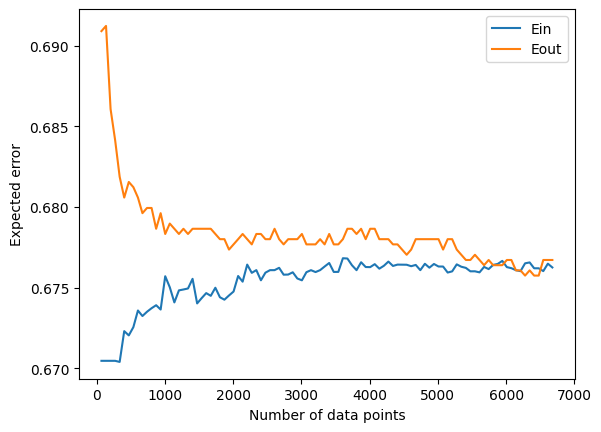

In [ ]:
# Crear la gráfica
plt.plot(N_points, expected_Ein, label='Ein')
plt.plot(N_points, expected_Eout, label='Eout')

# Agregar etiquetas y leyenda
plt.xlabel('Number of data points')
plt.ylabel('Expected error')
plt.legend()

# Mostrar la gráfica
plt.show()

Vemos como para pocos valores tenemos un Ein bajo y un Eout alto, probablemente aquí está habiendo sobreajuste, el modelo en vez de ajustarse a los datos simplemente los memoriza, lo que nos da una diferencia entre Ein y Eout tan grande, según vamos entrenando con sets más grandes esta diferencia va disminuyendo hasta ser prácticamente la misma, comparandola con las gráficas teóricas para un modelo complejo y uno simple parece que nuestro modelo es simple, es decir no sobreajusta demasiado en train y consigue generalizar bien para sets fuera de la muestra, pero no es tan simple como para no poder ajustarse siquiera a los datos. En definitiva un buen modelo en ese aspecto.

#### <font color='blue'>9)  Suponga ahora que Ud. debe realizar este ajuste para una empresa que le ha proporcionado los datos, sin distinción entre training y test. ¿Cúal sería el mejor modelo que les propondría, y qué error  $E_{out}$ les diría que tiene? Justifique todas las decisiones. 0.5 puntos.

Primero separaría en los datos en train y test, dependiendo del tamaño del set inicial daría más porcentaje a test o menos, es importante tener un training set lo más grande posible para tener una mejor representación de la población, aunque también es importante que test set no sea muy pequeño, ya que queremos que este sea una representación fiable de la población fuera de la muestra para poder estimar un buen Eout al final del entrenamiento. En el caso de este problema considero que tener el 20% de los datos para test es suficiente.

Cuando tenemos nuestros dos sets uso Cross-Validation para encontrar el mejor modelo con los mejores parámetros para el ajuste, el uso de CV nos permite entrenar con distintos minisets de train usando otra parte de train para validar ese entrenamiento, a más minisets tengamos más entrenamientos se harán y obtendremos unas métricas medias más fiables, en nuestro caso usamos 5-folds CV, debemos encontrar un equilibrio entre tiempo de cómputo y folds a crear, con 5-folds tenemos ese equilibrio.

Una vez entrenado elegimos el mejor modelo comparando gracias a CV, reentrenamos el mismo con todo el train set y vemos como ajusta en test, apartir de ahí estimamos Eout.

Este es el esquema de entrenamiento, pero antes de empezar dicho entrenamiento sería conveniente visualizar un poco train para conocerlo mejor y tratar dichos datos, con esto me refiero a reducir dimensionalidad, eliminar muestras con valores extremos, codificar características o lo que sea conveniente dependiendo de los datos que se proporcionen.

En todo este proceso es muy importante no visualizar ni hacer nada con test, ya que ver de alguna forma test influirá en nuestra forma de proceder con el problema y esto puede resultar en un modelo que no generalice bien fuera de la muestra.